# Programming in PySpark RDD’s
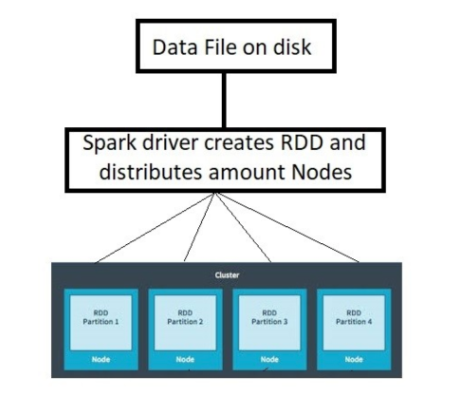
## RDDs from Parallelized collections
Resilient Distributed Dataset (RDD) is the basic abstraction in Spark. It is an immutable distributed collection of objects. Since RDD is a fundamental and backbone data type in Spark, it is important that you understand how to create it. 

In [2]:
import pyspark as sp
sc = sp.SparkContext.getOrCreate()

In [3]:
# Create an RDD from a list of words
RDD = sc.parallelize(["Spark", "is", "a", "framework", "for", "Big Data processing"])

# Print out the type of the created object
print("The type of RDD is", type(RDD))

The type of RDD is <class 'pyspark.rdd.RDD'>


## RDDs from External Datasets
PySpark can easily create RDDs from files that are stored in external storage devices such as HDFS (Hadoop Distributed File System), Amazon S3 buckets, etc. However, the most common method of creating RDD's is from files stored in your local file system. This method takes a file path and reads it as a collection of lines. 

In [4]:
file_path = '5000_points.txt'

In [5]:
# Print the file_path
print("The file_path is", file_path)

# Create a fileRDD from file_path
fileRDD = sc.textFile(file_path)

# Check the type of fileRDD
print("The file type of fileRDD is", type(fileRDD))

The file_path is 5000_points.txt
The file type of fileRDD is <class 'pyspark.rdd.RDD'>


## Partitions in your data
SparkContext's `textFile()` method takes an optional second argument called `minPartitions` for specifying the minimum number of partitions.

In [6]:
# Check the number of partitions in fileRDD
print("Number of partitions in fileRDD is", fileRDD.getNumPartitions())

# Create a fileRDD_part from file_path with 5 partitions
fileRDD_part = sc.textFile(file_path, minPartitions = 5)

# Check the number of partitions in fileRDD_part
print("Number of partitions in fileRDD_part is", fileRDD_part.getNumPartitions())

Number of partitions in fileRDD is 2
Number of partitions in fileRDD_part is 5


## Basic RDD Transformations and Actions
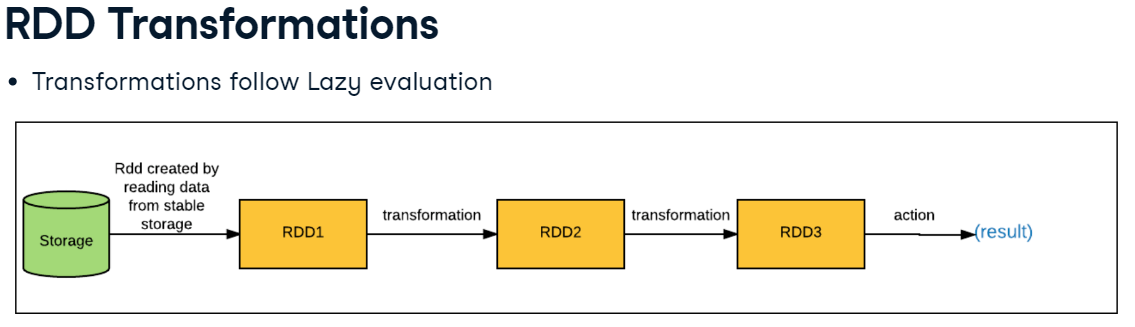
* Basic RDD Transformations
 - `map()`, `filter()`, `flatMap()`, and `union()`
* Basic RDD Actions
 - `collect()`, `take(N)`, `fisrt()`, and `count()`

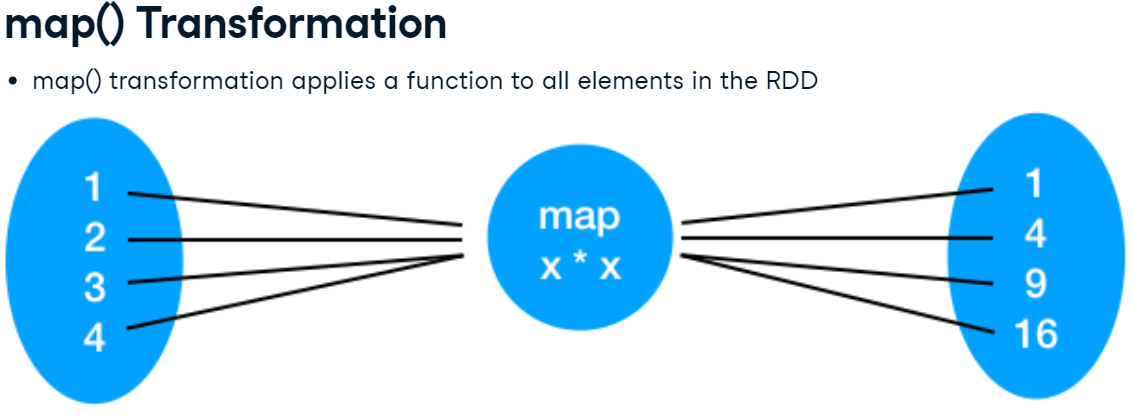

In [7]:
RDD = sc.parallelize([1,2,3,4])
RDD_map = RDD.map(lambda x: x * x)

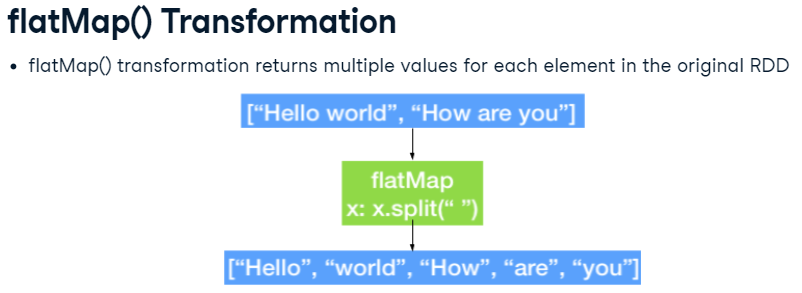

In [14]:
RDD = sc.parallelize(["hello world", "how are you"])
RDD_flatmap = RDD.flatMap(lambda x:x.split(" "))

the main difference between `map()` and `flatMap()` is that map() returns an RDD of the same length as the input RDD, with each element transformed by the function, while flatMap() returns an RDD of flattened results, where the function can return zero, one, or multiple values for each element in the input RDD.

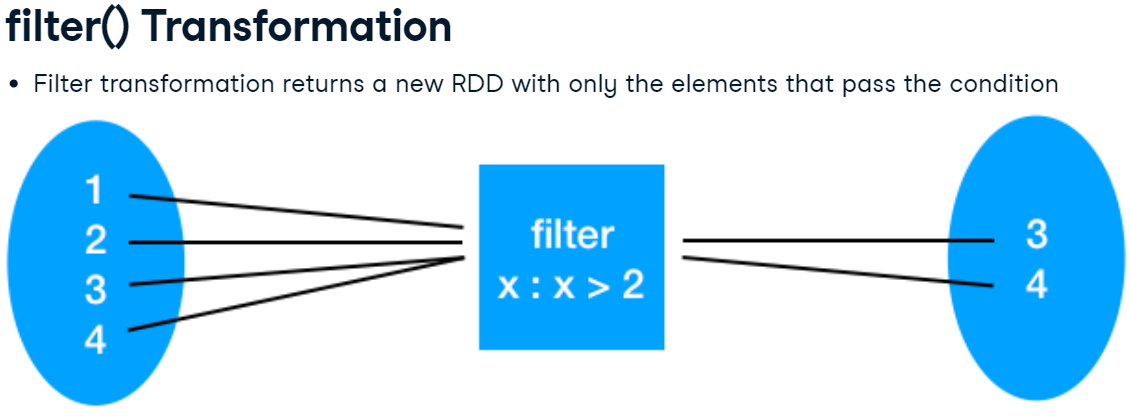

In [8]:
RDD = sc.parallelize([1,2,3,4])
RDD_map = RDD.map(lambda x: x > 2)

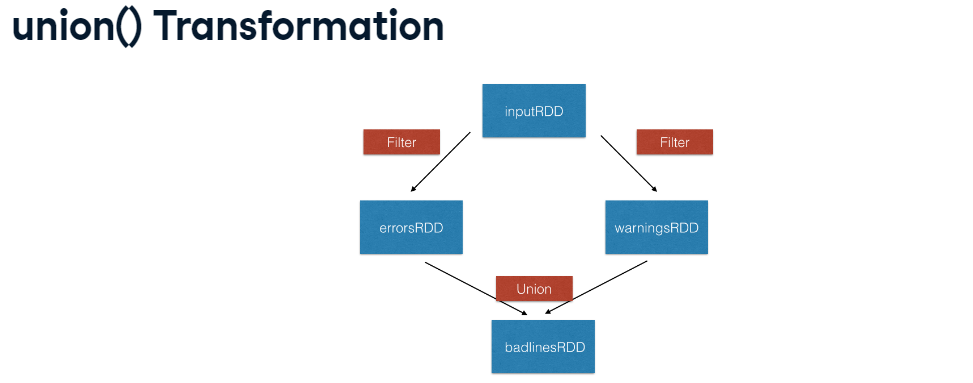

In [9]:
inputRDD = sc.textFile("spam.txt")
errorRDD = inputRDD.filter(lambda x: "error" in x.split())
warningsRDD = inputRDD.filter(lambda x: "warning" in x.split())
combinedRDD = errorRDD.union(warningsRDD)

* **collect()** return all the elements of the dataset as an array

In [10]:
RDD_map = sc.parallelize([1, 4, 9, 16, 25, 36, 49])

In [11]:
RDD_map.collect()

[1, 4, 9, 16, 25, 36, 49]

* **take(N)** returns an array with the first N elements of the dataset

In [14]:
RDD_map.take(1)

[1]

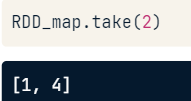

* **first()** prints the first element of the RDD

In [15]:
RDD_map.first()

1

* **count()** return the number of elements in the RDD

In [16]:
RDD_map.count()

7

## Map and Collect
The main method by which you can manipulate data in PySpark is using `map()`. The `map()` transformation takes in a function and applies it to each element in the RDD. It can be used to do any number of things, from fetching the website associated with each URL in our collection to just squaring the numbers. 

In [22]:
numbRDD = sc.parallelize([1,2,3,4])

In [23]:
# Create map() transformation to cube numbers
cubedRDD = numbRDD.map(lambda x: x**3)

# Collect the results
numbers_all = cubedRDD.collect()

# Print the numbers from numbers_all
for numb in numbers_all:
    print(numb)

1
8
27
64


## Filter and Count
The RDD transformation `filter()` returns a new RDD containing only the elements that satisfy a particular function. It is useful for filtering large datasets based on a keyword. 

In [24]:
# file path
file_path = "spam.txt"
# Load a local file into PySpark shell
fileRDD = sc.textFile(file_path)

In [25]:
# Filter the fileRDD to select lines with Spark keyword
fileRDD_filter = fileRDD.filter(lambda line: 'FREE' in line)

In [26]:
# How many lines are there in fileRDD?
print("The total number of lines with the keyword Spark is", fileRDD_filter.count())

The total number of lines with the keyword Spark is 112


In [27]:
# Print the first four lines of fileRDD
for line in fileRDD_filter.take(4): 
    print(line)

FREE MSG:We billed your mobile number by mistake from shortcode 83332.Please call 08081263000 to have charges refunded.This call will be free from a BT landline
FREE camera phones with linerental from 4.49/month with 750 cross ntwk mins. 1/2 price txt bundle deals also avble. Call 08001950382 or call2optout/J MF
You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again
Had your mobile 11mths ? Update for FREE to Oranges latest colour camera mobiles & unlimited weekend calls. Call Mobile Upd8 on freefone 08000839402 or 2StopTxt


## Pair RDDs in PySpark
key/value pairs: key is the identifier and value is data


### Creating pair RDDs
* Two common ways to create pair RDDs
 - From a list of key-value tuple
 - From a regular RDD
* Get the data into key/value form for paired RDD

In [28]:
my_tuple = [('Sam', 23), ('Mary', 34), ('Peter', 25)]
pairRDD_tuple = sc.parallelize(my_tuple)

In [29]:
my_list = ['Sam 23', 'Mary 34', 'Peter 25']
regularRDD = sc.parallelize(my_list)
pairRDD_RDD = regularRDD.map(lambda s: (s.split(' ')[0], s.split(' ')[1]))

### Transformations on pair RDDs
* All regular transformations work on pair RDD
* Have to pass functions that operate on key value pairs rather than on individual elements
* Paired RDD Transformations: 
  - `reduceByKey(func)`: Combine values with the same key
  - `groupByKey()`: Group values with the same key
  - `sortByKey()`: Return an RDD sorted by the key
  - `join()`: Join two pair RDDs based on their key

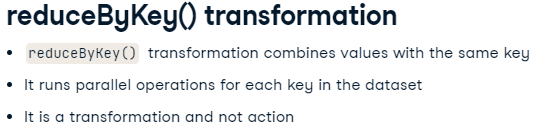

In [17]:
regularRDD = sc.parallelize([("Messi", 23), ("Ronaldo", 34),
             ("Neymar", 22), ("Messi", 24)])
pairRDD_reducebykey = regularRDD.reduceByKey(lambda x,y : x + y)
pairRDD_reducebykey.collect()

[('Neymar', 22), ('Ronaldo', 34), ('Messi', 47)]

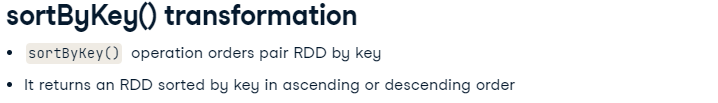

In [18]:
pairRDD_reducebykey_rev = pairRDD_reducebykey.map(lambda x: (x[1], x[0]))
pairRDD_reducebykey_rev.sortByKey(ascending=False).collect()

[(47, 'Messi'), (34, 'Ronaldo'), (22, 'Neymar')]

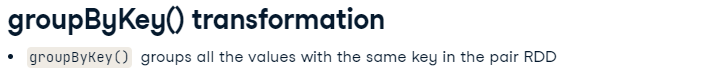

In [20]:
airports = [("US", "JFK"),("UK", "LHR"),("FR", "CDG"),("US", "SFO")]
regularRDD = sc.parallelize(airports)
pairRDD_group = regularRDD.groupByKey().collect()
for cont, air in pairRDD_group:
    print(cont, list(air))

US ['JFK', 'SFO']
FR ['CDG']
UK ['LHR']


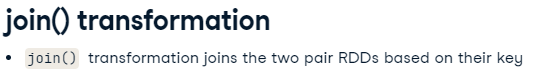

In [21]:
RDD1 = sc.parallelize([("Messi", 34),("Ronaldo", 32),("Neymar", 24)])
RDD2 = sc.parallelize([("Ronaldo", 80),("Neymar", 120),("Messi", 100)])
RDD1.join(RDD2).collect()

[('Ronaldo', (32, 80)), ('Neymar', (24, 120)), ('Messi', (34, 100))]

## ReduceBykey and Collect
reduceByKey() operates on key, value (k,v) pairs and merges the values for each key. 

In [24]:
# Create PairRDD Rdd with key value pairs
Rdd = sc.parallelize([(1,2),(3,4),(3,6),(4,5)])

# Apply reduceByKey() operation on Rdd
Rdd_Reduced = Rdd.reduceByKey(lambda x, y: x+y)

# Iterate over the result and print the output
for num in Rdd_Reduced.collect(): 
    print("Key {} has {} Counts".format(num[0], num[1]))

Key 4 has 5 Counts
Key 1 has 2 Counts
Key 3 has 10 Counts


## SortBykey and Collect
**sortByKey()** returns an RDD sorted by key in ascending or descending order

In [25]:
# Sort the reduced RDD with the key by descending order
Rdd_Reduced_Sort = Rdd_Reduced.sortByKey(ascending=False)

# Iterate over the result and retrieve all the elements of the RDD
for num in Rdd_Reduced_Sort.collect():
    print("Key {} has {} Counts".format(num[0], num[1]))

Key 4 has 5 Counts
Key 3 has 10 Counts
Key 1 has 2 Counts


## Advanced RDD Actions
**reduce() action**
* `reduce(func)` action is used for aggregating 2 elements of same type) and returns a new element of the same type.
* The function should be commutative (changing the order of the operands does not change the result) and associative

In [26]:
x = [1,3,4,6]
RDD = sc.parallelize(x)
RDD.reduce(lambda x, y: x+y)

14

In many cases, it is not advisable to run collect action on RDDs because of the huge size of the data.<br>
**saveAsTextFile() action**
* `saveAsTextFile()` action saves RDD into a text file inside a directory with each partition as a separate file

In [ ]:
RDD.saveAsTextFile("tempFile")

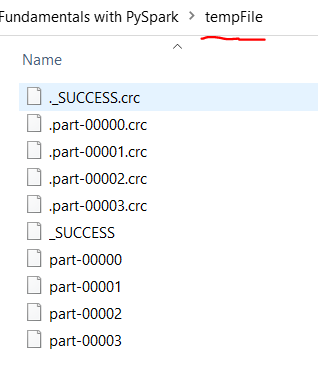 

* `coalesce()` method can be used to save RDD as a single text file

In [81]:
RDD.coalesce(1).saveAsTextFile("tempFile1")

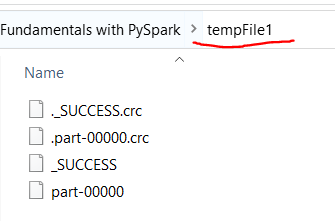

### Action Operations on pair RDDs
### countByKey() action
* `countByKey()` only available for type(K,V)
* `countByKey()` action counts the number of elements for each key<br>
**note**: countByKey should only be used on a dataset whose size is small enough to fit in memory.

In [27]:
rdd = sc.parallelize([("a", 1), ("b", 1),("a", 1)])
for kee, val in rdd.countByKey().items():
    print(kee, val)

a 2
b 1


### collectAsMap() action
* `collectAsMap()` return the key-value pairs in the RDD as a dictionary
**note**: similar to countByKey, this action should only be used if the resulting data is expected to be small, as all the data is loaded into the memory. 

In [28]:
sc.parallelize([(1,2),(3,4)]).collectAsMap()

{1: 2, 3: 4}

## CountingBykeys
For many datasets, it is important to count the number of keys in a key/value dataset. For example, counting the number of countries where the product was sold or to show the most popular baby names. In this simple exercise, you'll use the Rdd that you created earlier and count the number of unique keys in that pair RDD.

In [29]:
# Count the unique keys
total = Rdd.countByKey()

# What is the type of total?
print("The type of total is", type(total))

# Iterate over the total and print the output
for k, v in total.items(): 
    print("key", k, "has", v, "counts")

The type of total is <class 'collections.defaultdict'>
key 1 has 1 counts
key 3 has 2 counts
key 4 has 1 counts


## Create a base RDD and transform it
**write code that calculates the most common words**<br>
Here are the brief steps for writing the word counting program:<br>

* Create a base RDD from Complete_Shakespeare.txt file.
* Use RDD transformation to create a long list of words from each element of the base RDD.
* Remove stop words from your data.
* Create pair RDD where each element is a pair tuple of ('w', 1)
* Group the elements of the pair RDD by key (word) and add up their values.
* Swap the keys (word) and values (counts) so that keys is count and value is the word.
* Finally, sort the RDD by descending order and print the 10 most frequent words and their frequencies.
<br><br>
* In this first part, you'll create a base RDD from Complete_Shakespeare.txt file and transform it to create a long list of words.

In [41]:
# file path
file_path = "Complete_Shakespeare.txt"

In [42]:
# Create a baseRDD from the file path
baseRDD = sc.textFile(file_path)

# Split the lines of baseRDD into words
splitRDD = baseRDD.flatMap(lambda x: x.split())

# Count the total number of words
print("Total number of words in splitRDD:", splitRDD.count())

Total number of words in splitRDD: 128576


## Remove stop words and reduce the dataset
* in the next step, you'll remove stop words from your data. Stop words are common words that are often uninteresting. For example "I", "the", "a" etc., are stop words.

* After removing stop words, you'll next create a pair RDD where each element is a pair tuple `(k, v)` where `k` is the key and `v` is the value. In this example, pair RDD is composed of `(w, 1)` where `w` is for each word in the RDD and `1` is a number.
* Finally, you'll combine the values with the same key from the pair RDD.Stop words are common words that are often uninteresting. For example "I", "the", "a" etc., are stop words.

In [43]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 
              'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 
              'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 
              'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 
              'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 
              'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
              'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
              'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few',
              'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
              'can', 'will', 'just', 'don', 'should', 'now']

In [44]:
# Convert the words in lower case and remove stop words from the stop_words curated list
splitRDD_no_stop = splitRDD.filter(lambda x: x.lower() not in stop_words)

# Create a tuple of the word and 1 
splitRDD_no_stop_words =splitRDD_no_stop.map(lambda w: (w, 1))

# Count of the number of occurences of each word
resultRDD = splitRDD_no_stop_words.reduceByKey(lambda x, y: x + y)

## Print word frequencies
You could have retrieved all the elements at once using collect() but it is not recommended. RDDs can be huge: you may run out of memory and crash your computer..<br>
For this, first you'll need to swap the key (word) and values (counts) so that keys is count and value is the word. After you swap the key and value in the tuple, you'll sort the pair RDD based on the key (count). This way it is easy to sort the RDD based on the key rather than the key using sortByKey operation in PySpark. Finally, you'll return the top 10 words from the sorted RDD.

In [45]:
# Display the first 10 words and their frequencies from the input RDD
for word in resultRDD.take(10):
    print(word)

('Project', 9)
('EBook', 1)
('Shakespeare', 12)
('use', 38)
('anyone', 1)
('anywhere', 1)
('restrictions', 1)
('whatsoever.', 1)
('may', 162)
('it,', 74)


In [46]:
# Swap the keys and values from the input RDD
resultRDD_swap = resultRDD.map(lambda x: (x[1], x[0]))

# Sort the keys in descending order
resultRDD_swap_sort = resultRDD_swap.sortByKey(ascending=False)

# Show the top 10 most frequent words and their frequencies from the sorted RDD
for word in resultRDD_swap_sort.take(10):
    print("{},{}". format(word[1], word[0]))

thou,650
thy,574
shall,393
would,311
good,295
thee,286
love,273
Enter,269
th',254
make,225
